In [1]:
import pandas as pd
df = pd.read_csv("M:/Downloads/SMSSpamCollection.csv", sep = '\t', names = ['label','text'])

In [2]:
df 

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.shape

(5572, 2)

In [4]:
import nltk

In [5]:

nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lykir\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
sent = 'Hello friends! How are you?'

In [7]:
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lykir\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [8]:
nltk.word_tokenize(sent)

['Hello', 'friends', '!', 'How', 'are', 'you', '?']

In [9]:
from nltk.corpus import stopwords 
swords = stopwords.words('english')

In [10]:
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
clean = [word for word in word_tokenize(sent) if word not in swords]

In [12]:
clean

['Hello', 'friends', '!', 'How', '?']

In [13]:
from nltk.stem import PorterStemmer

In [14]:
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent) if word not in swords]
clean

['hello', 'friend', '!', 'how', '?']

In [15]:
sent1 = 'Hello friends! How are you? We will be learning Python today.'

In [17]:
def clean_text(sent):
    tokens = word_tokenize(sent) 
    clean = [word for word in tokens if word.isdigit() or word.isalpha()] 
    clean = [ps.stem(word) for word in clean if word not in swords] 
    return clean

In [18]:
clean_text(sent1)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = clean_text)

In [20]:
x = df['text'] 
y = df['label']

In [21]:
x_new = tfidf.fit_transform(x)
x.shape

(5572,)

In [22]:
x_new.shape

(5572, 6513)

In [23]:
x_new

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52578 stored elements and shape (5572, 6513)>

In [25]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0, test_size=0.25)
x_train.shape

(4179, 6513)

In [27]:
x_test.shape

(1393, 6513)

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.toarray(), y_train)

GaussianNB()

In [29]:
y_pred = nb.predict(x_test.toarray())

In [30]:
y_test.value_counts()

label
ham     1208
spam     185
Name: count, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred,labels = nb.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = nb.classes_)

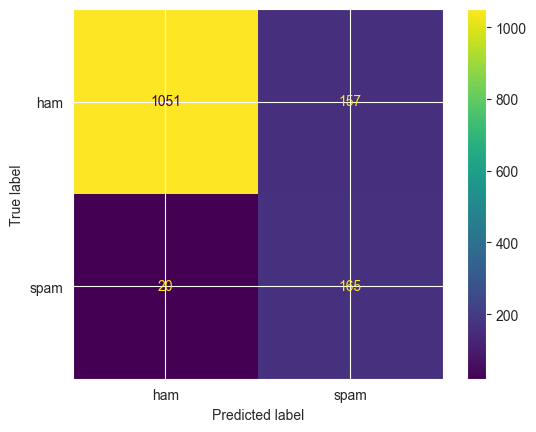

In [34]:
disp.plot()

In [35]:
from sklearn.metrics import classification_report, accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.8729361091170137

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(random_state=0)

In [40]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [41]:
y_pred = rf.predict(x_test)

In [42]:
cm = confusion_matrix(y_test, y_pred,labels = rf.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = rf.classes_)

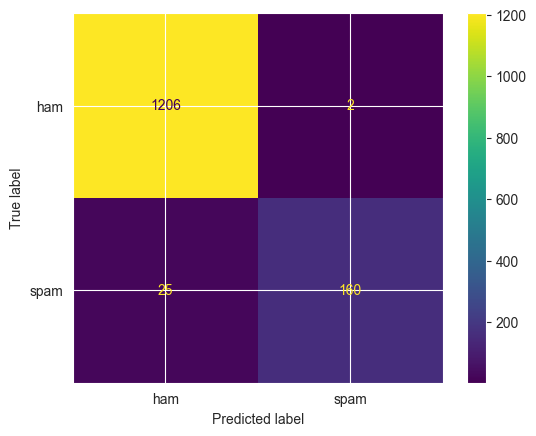

In [43]:
disp.plot()

In [44]:
accuracy_score(y_test, y_pred)

0.9806173725771715

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [46]:
from sklearn.linear_model import LogisticRegression 
log = LogisticRegression() 
log.fit(x_train, y_train) 
y_pred = log.predict(x_test) 
accuracy_score(y_test, y_pred)

0.9641062455132807

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
params= { 
'criterion': ['gini','entropy'], 
'max_features': ['sqrt','log2'], 
'random_state': [0,1,2,3,4], 
'class_weight': ['balanced','balanced_subsample'] 
} 

In [49]:
grid = GridSearchCV(rf,param_grid=params, cv = 5,scoring='accuracy')

In [50]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [53]:
grid.best_estimator_

RandomForestClassifier(class_weight='balanced', random_state=1)

In [54]:
rf = grid.best_estimator_
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9777458722182341